In [1]:
from sklearn.datasets import load_iris
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import numpy as np
import platform
import re
from pandas import Timestamp

from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.metrics.cluster import adjusted_rand_score

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering

In [2]:
import glob
import pandas as pd
import json
import requests
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler

In [3]:
import geopandas as gpd
import geopy
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

In [4]:
df = pd.read_csv('HDB Resale Price from 1990 to 2023.csv')
df.head()


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,53,9000.0
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,53,6000.0
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,53,8000.0
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,53,6000.0
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,52,47200.0


In [5]:
df_2 = pd.read_csv("HDB Resale Price from 1990 to 2023.csv")
df_2.sample(5)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
349181,2001-09,TAMPINES,3 ROOM,885,TAMPINES ST 83,10 TO 12,74.0,Model A,1987,63,183000.0
181672,1998-02,BISHAN,3 ROOM,309,SHUNFU RD,07 TO 09,67.0,NEW GENERATION,1984,60,194500.0
720511,2015-08,WOODLANDS,3 ROOM,24,MARSILING DR,13 TO 15,67.0,New Generation,1977,60,266000.0
589320,2009-10,MARINE PARADE,4 ROOM,61,MARINE DR,01 TO 03,87.0,Improved,1976,52,405000.0
17632,1991-06,GEYLANG,3 ROOM,59,SIMS DR,10 TO 12,59.0,IMPROVED,1977,53,45000.0


In [6]:
df_3 = pd.read_csv("combined.csv")
df_3.sample(5)

C:\Users\Game\AppData\Local\Temp\ipykernel_5352\3755158852.py:1: DtypeWarning: Columns (2,4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df_3 = pd.read_csv("combined.csv")


,latitude,longitude,blk_no,road_name,postal_code,address,cbd_dist,min_dist_mrt,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,lease_remain_years
706328,1.445373,103.798968,723,WOODLANDS AVENUE 6,730723,723 WOODLANDS AVE 6,18875.280026,574.885341,2008-08,WOODLANDS,5 ROOM,723,WOODLANDS AVE 6,01 TO 03,121.0,Improved,1997,73,325000.0,73
594480,1.378267,103.741111,295,CHOA CHU KANG AVENUE 2,680295,295 CHOA CHU KANG AVE 2,16166.248453,864.484890,1996-07,CHOA CHU KANG,4 ROOM,295,CHOA CHU KANG AVE 2,04 TO 06,109.0,MODEL A,1990,66,325000.0,66
813387,1.387855,103.908393,157A,RIVERVALE CRESCENT,541157,157A RIVERVALE CRES,13221.196157,1497.938810,2012-12,SENGKANG,5 ROOM,157A,RIVERVALE CRES,04 TO 06,109.0,Premium Apartment,2003,79,520000.0,79
767159,1.435392,103.835501,296,YISHUN STREET 20,760296,296 YISHUN ST 20,16942.238943,660.139386,2006-06,YISHUN,4 ROOM,296,YISHUN ST 20,07 TO 09,90.0,Model A,2000,76,248000.0,76
710506,1.344096,103.757275,290C,BUKIT BATOK EAST AVENUE 3,650290,290C BT BATOK EAST AVE 3,12455.330060,1020.477919,2002-05,BUKIT BATOK,EXECUTIVE,290C,BT BATOK EAST AVE 3,01 TO 03,142.0,Apartment,1997,73,410000.0,73


D:\Anaconda\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


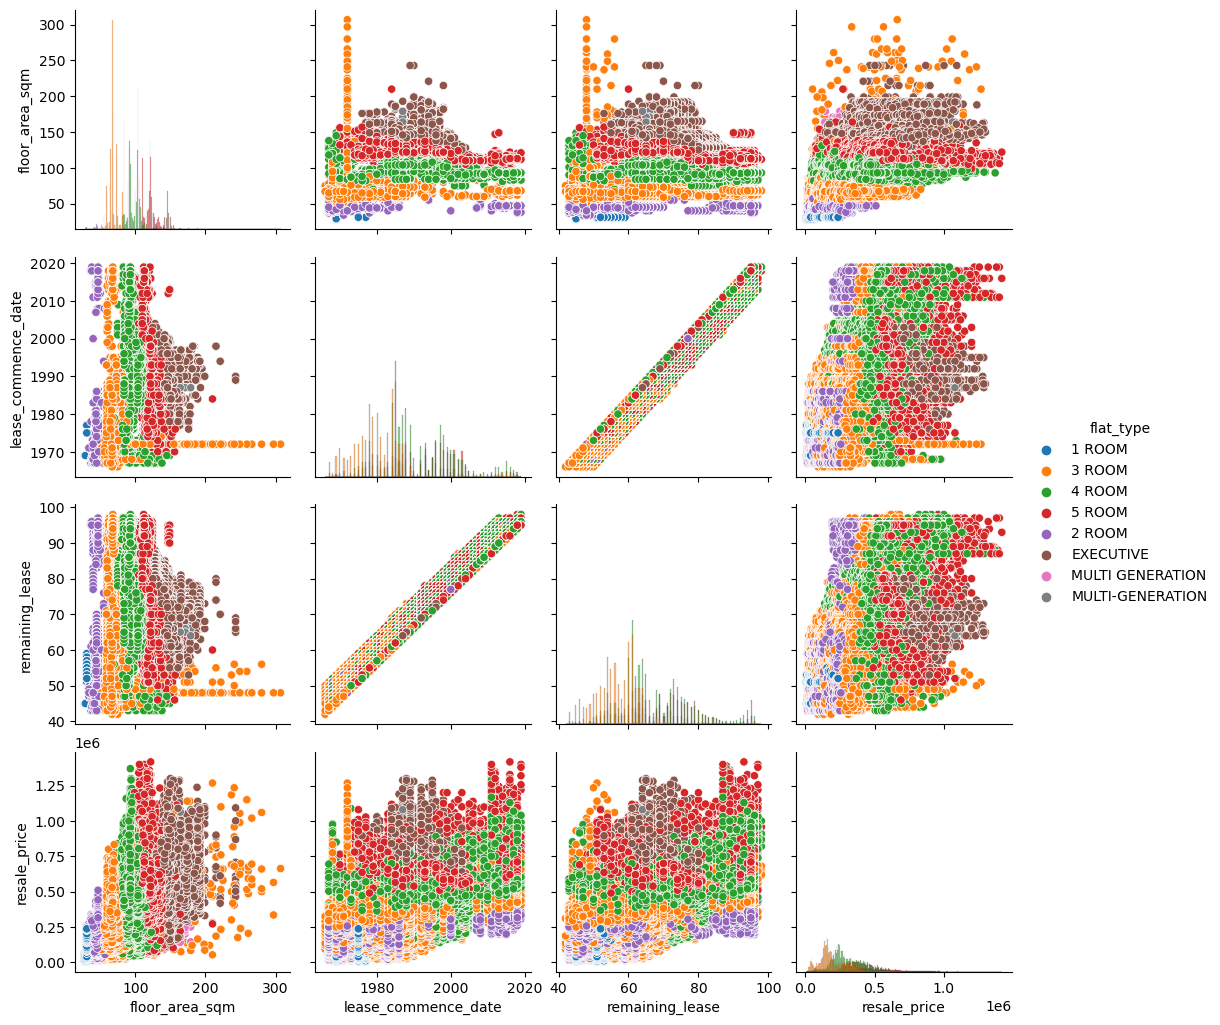

In [7]:
sns.pairplot(df_2, hue="flat_type", diag_kind="hist", size=2.6);


In [8]:
df_2['resale_price'].describe()


count    8.953900e+05
mean     3.114602e+05
std      1.626028e+05
min      5.000000e+03
25%      1.900000e+05
50%      2.900000e+05
75%      4.050000e+05
max      1.418000e+06
Name: resale_price, dtype: float64

Skewness: 0.900218


D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'$\\mathrm{Distribution\\ of\\ Price:}\\ \\mu=311460.154,\\ \\sigma=162602.826$'}, xlabel='resale_price', ylabel='Probability Density'>

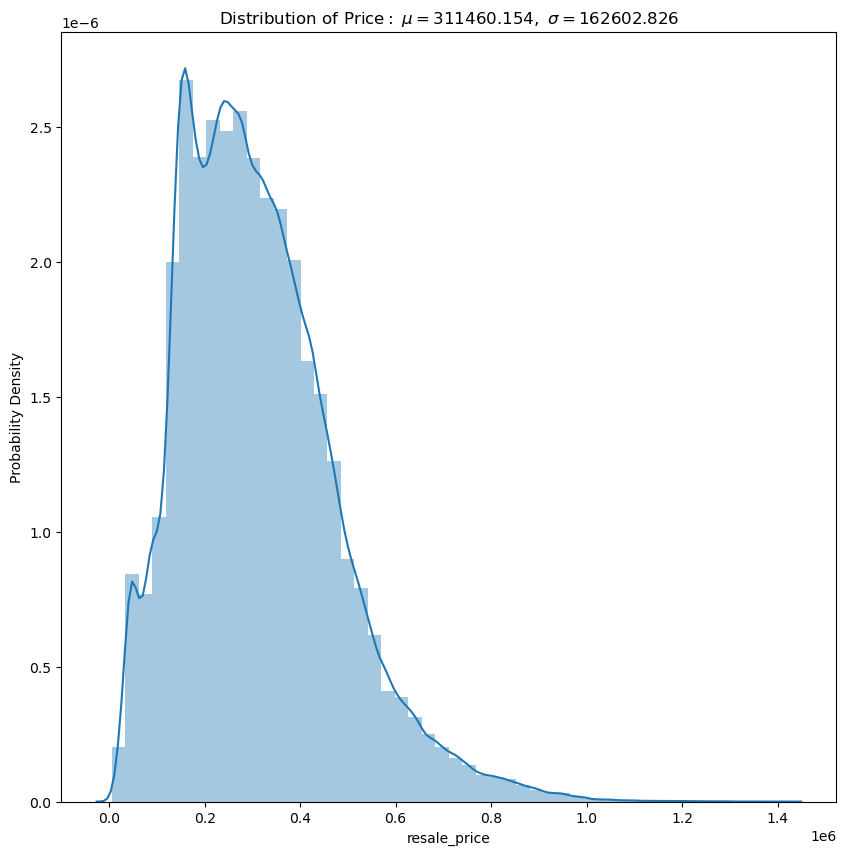

In [9]:
mu = df_2['resale_price'].mean()
sigma = df_2['resale_price'].std()
plt.figure(figsize=(10,10))
plt.xlabel('House Price')
plt.ylabel('Probability Density')


plt.title(r'$\mathrm{Distribution\ of\ Price:}\ \mu=%.3f,\ \sigma=%.3f$'%(mu,sigma))
print("Skewness: %f" % df_2['resale_price'].skew())
sns.distplot(df_2['resale_price'] )

C:\Users\Game\AppData\Local\Temp\ipykernel_5352\2304944679.py:9: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df_2.price = (df_2.resale_price - m) / std
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='resale_price', ylabel='Density'>

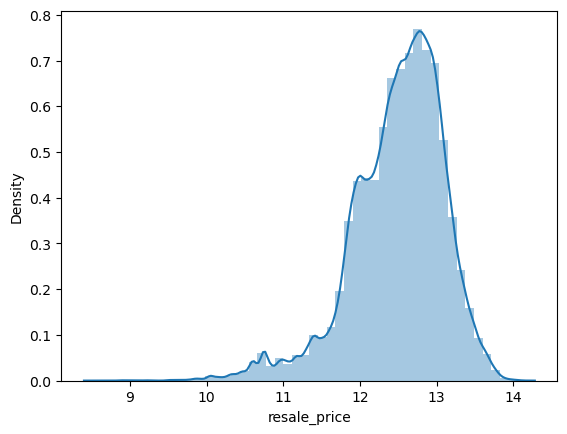

In [10]:
# log the price
df_2["resale_price"] = np.log(df_2["resale_price"])
# get the mean for the log price
m=df_2.resale_price.mean()
# get the standard deviation of the log price
std=df_2.resale_price.std()

#scaling to get a log normal distribution
df_2.price = (df_2.resale_price - m) / std
sns.distplot(df_2.resale_price)

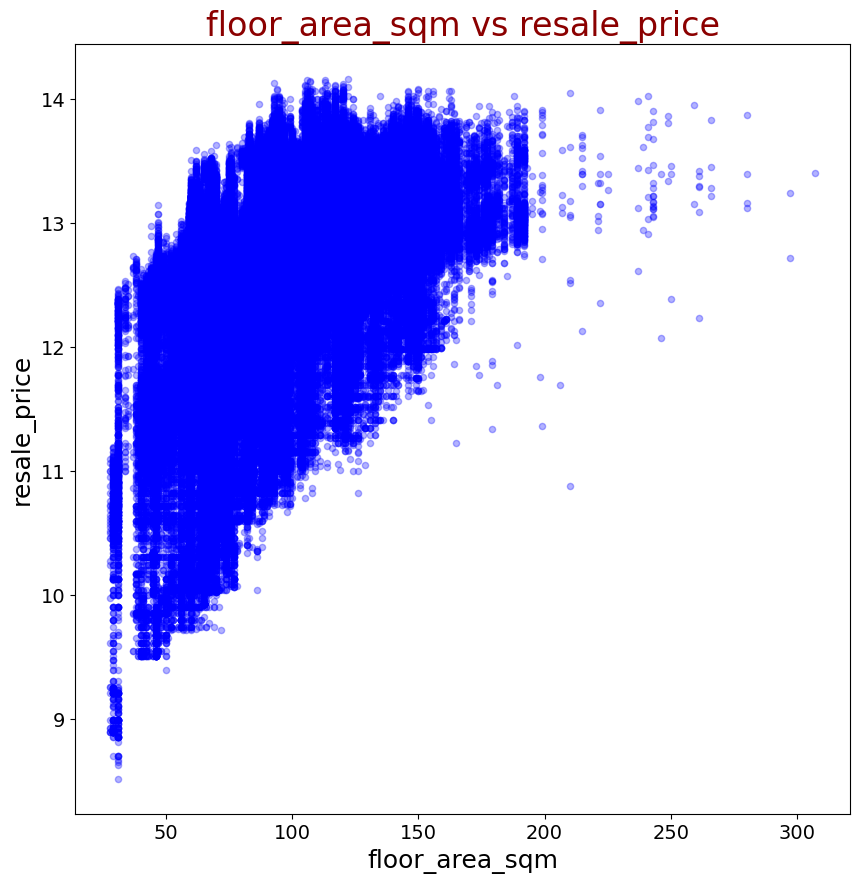

In [11]:
df_2.plot(x ='floor_area_sqm', y = 'resale_price', kind ="scatter", figsize = [10,10], color ="b", alpha = 0.3, fontsize = 14)
plt.title("floor_area_sqm vs resale_price",fontsize = 24, color="darkred")

plt.xlabel("floor_area_sqm", fontsize = 18) 

plt.ylabel("resale_price", fontsize = 18)

plt.show()

C:\Users\Game\AppData\Local\Temp\ipykernel_5352\2569621433.py:1: DtypeWarning: Columns (2,4,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df_3 = pd.read_csv("combined.csv")


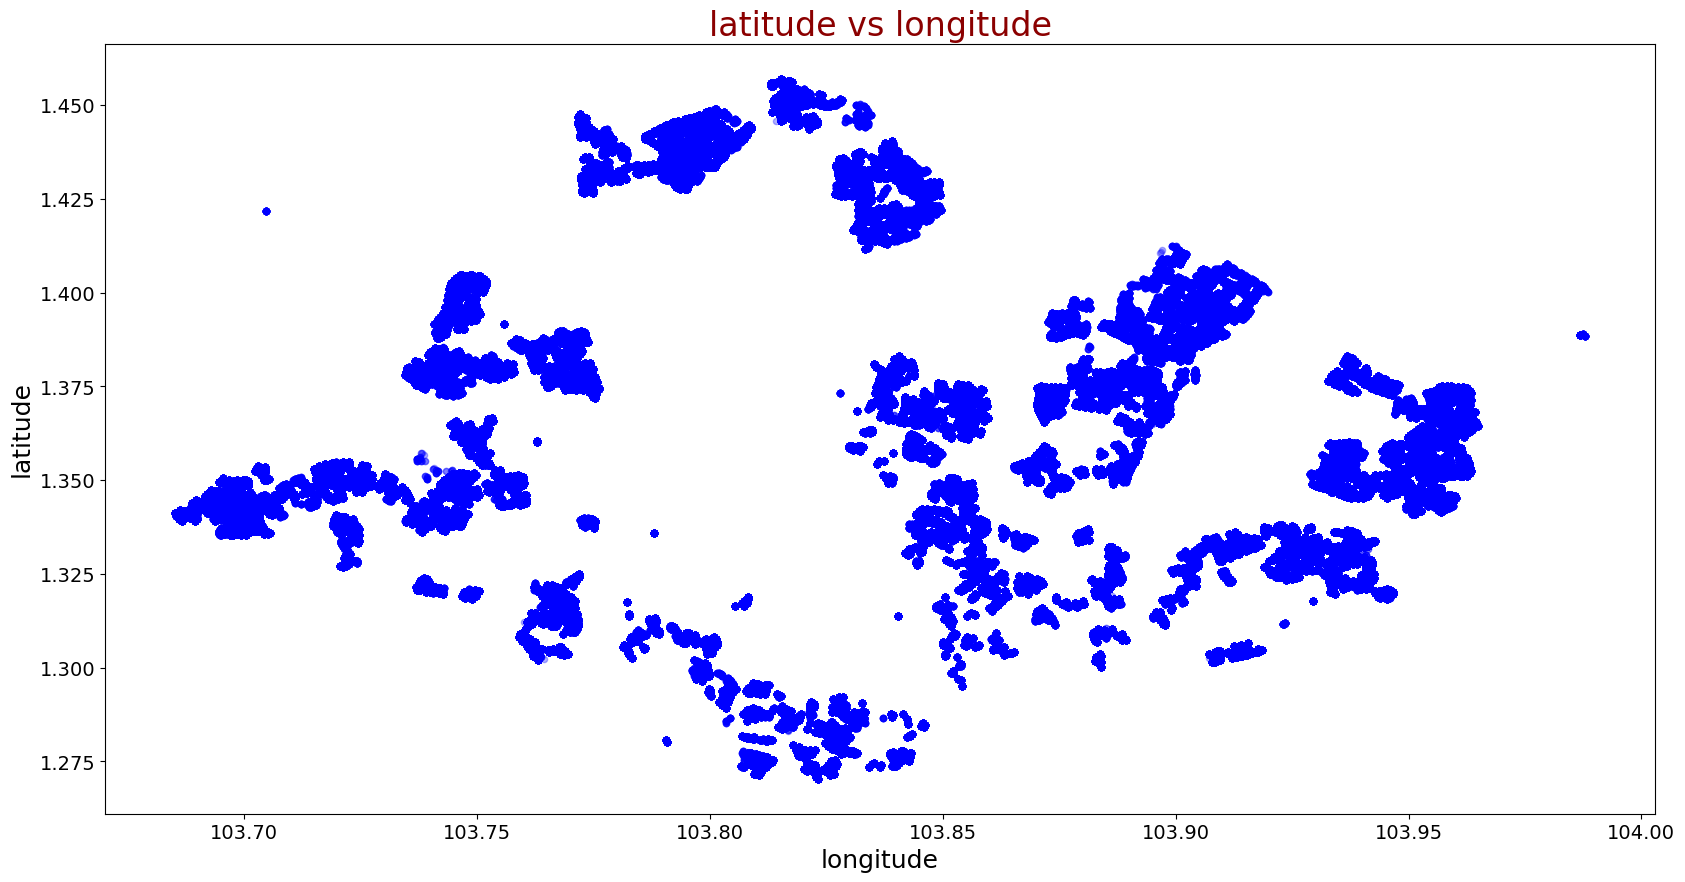

In [12]:
df_3 = pd.read_csv("combined.csv")

df_3.plot(x ='longitude', y = 'latitude', kind ="scatter", figsize = [20,10], color ="b", alpha = 0.3, fontsize = 14)
plt.title("latitude vs longitude",fontsize = 24, color="darkred")

plt.xlabel("longitude", fontsize = 18) 

plt.ylabel("latitude", fontsize = 18)

plt.show()

#lonlat = plt(df_2,aes(x='long',y='lat',color='resale_price'))+geom_point()+scale_color_gradient(low='white',high='red')+ggtitle('Color Map of Price') 
#print(lonlat)

C:\Users\Game\AppData\Local\Temp\ipykernel_5352\2898447064.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(df_3[features].corr(), dtype=np.bool)


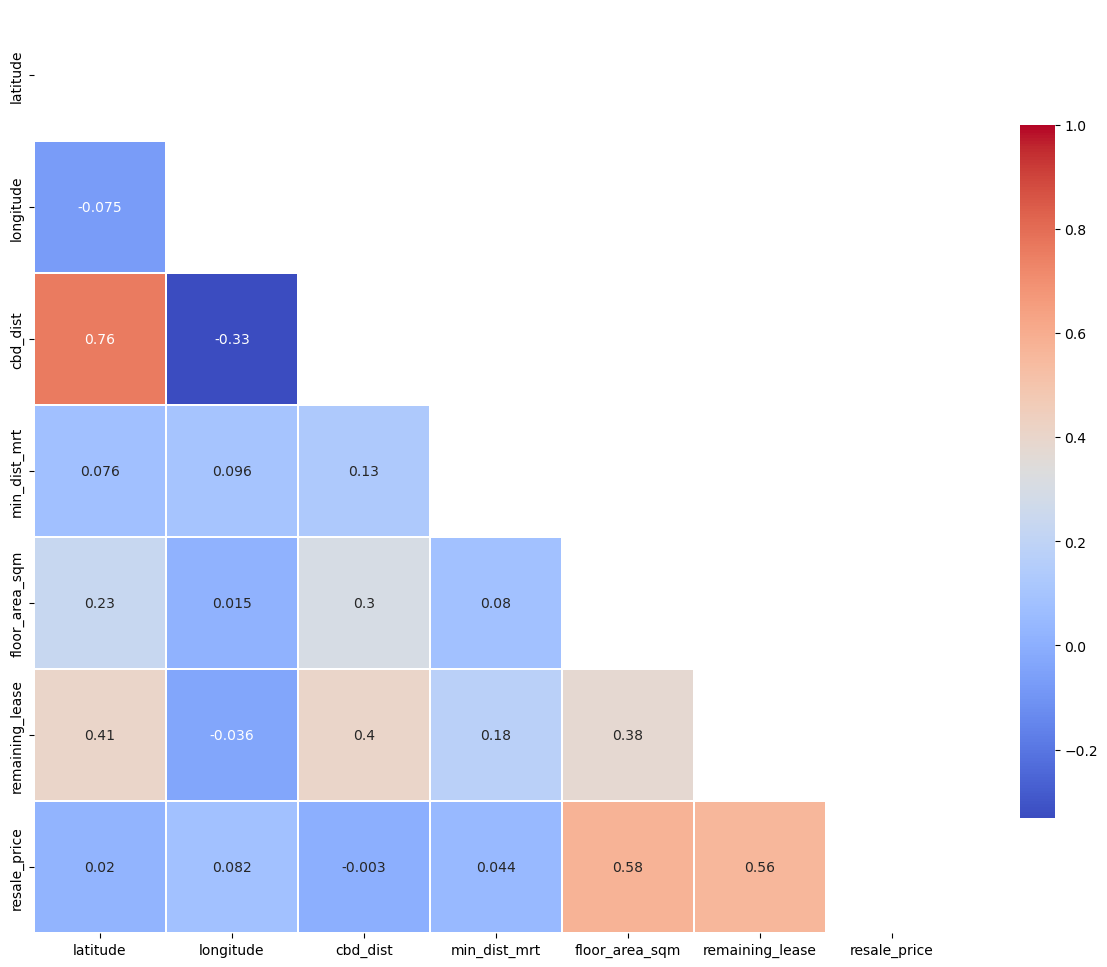

In [13]:
features = ['latitude','longitude','blk_no','road_name','postal_code',
            'cbd_dist','min_dist_mrt','flat_type','storey_range','floor_area_sqm',
            'flat_model','remaining_lease','resale_price']

mask = np.zeros_like(df_3[features].corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(16, 12))

sns.heatmap(df_3[features].corr(),linewidths=0.25,vmax=1.0,square=True,cmap="coolwarm", 
            linecolor='w',annot=True,mask=mask,cbar_kws={"shrink": .75});

In [17]:
import statistics

def get_median(x):
    split_list = x.split(' TO ')
    float_list = [float(i) for i in split_list]
    median = statistics.median(float_list)
    return median

In [18]:
df_3['storey_median'] = df['storey_range'].apply(lambda x: get_median(x))
df_3

,latitude,longitude,blk_no,road_name,postal_code,address,cbd_dist,min_dist_mrt,month,town,...,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,lease_remain_years,storey_median
0,1.366197,103.841505,216,ANG MO KIO AVENUE 1,560216,216 ANG MO KIO AVE 1,9263.833118,800.632183,1990-01,ANG MO KIO,...,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,52,47200.0,52,11.0
1,1.366197,103.841505,216,ANG MO KIO AVENUE 1,560216,216 ANG MO KIO AVE 1,9263.833118,800.632183,1990-03,ANG MO KIO,...,216,ANG MO KIO AVE 1,07 TO 09,73.0,NEW GENERATION,1976,52,47000.0,52,5.0
2,1.366197,103.841505,216,ANG MO KIO AVENUE 1,560216,216 ANG MO KIO AVE 1,9263.833118,800.632183,1990-05,ANG MO KIO,...,216,ANG MO KIO AVE 1,10 TO 12,88.0,NEW GENERATION,1976,52,55000.0,52,11.0
3,1.366197,103.841505,216,ANG MO KIO AVENUE 1,560216,216 ANG MO KIO AVE 1,9263.833118,800.632183,1990-08,ANG MO KIO,...,216,ANG MO KIO AVE 1,10 TO 12,73.0,NEW GENERATION,1976,52,47200.0,52,8.0
4,1.366197,103.841505,216,ANG MO KIO AVENUE 1,560216,216 ANG MO KIO AVE 1,9263.833118,800.632183,1990-08,ANG MO KIO,...,216,ANG MO KIO AVE 1,01 TO 03,73.0,NEW GENERATION,1976,52,34000.0,52,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884870,1.357134,103.737973,442C,BUKIT BATOK WEST AVENUE 8,653442,442C BT BATOK WEST AVE 8,15042.066510,1546.461933,2023-03,BUKIT BATOK,...,442C,BT BATOK WEST AVE 8,10 TO 12,112.0,Improved,2019,95,778000.0,95,5.0
884871,1.357134,103.738172,442B,BUKIT BATOK WEST AVENUE 8,652442,442B BT BATOK WEST AVE 8,15023.454666,1524.385550,2023-03,BUKIT BATOK,...,442B,BT BATOK WEST AVE 8,13 TO 15,112.0,Improved,2019,96,790000.0,95,2.0
884872,1.410519,103.896581,322C,SUMANG WALK,823322,322C SUMANG WALK,14973.847436,1588.460839,2023-03,PUNGGOL,...,322C,SUMANG WALK,01 TO 03,68.0,Premium Apartment,2019,95,437000.0,95,5.0
884873,1.410916,103.896887,322B,SUMANG WALK,822322,322B SUMANG WALK,15026.615091,1542.968496,2023-03,PUNGGOL,...,322B,SUMANG WALK,19 TO 21,93.0,Premium Apartment,2019,95,700000.0,95,11.0


In [19]:
scope_df = df_3[['cbd_dist','min_dist_mrt','floor_area_sqm','lease_remain_years','storey_median','resale_price']]
scope_df

,cbd_dist,min_dist_mrt,floor_area_sqm,lease_remain_years,storey_median,resale_price
0,9263.833118,800.632183,73.0,52,11.0,47200.0
1,9263.833118,800.632183,73.0,52,5.0,47000.0
2,9263.833118,800.632183,88.0,52,11.0,55000.0
3,9263.833118,800.632183,73.0,52,8.0,47200.0
4,9263.833118,800.632183,73.0,52,5.0,34000.0
...,...,...,...,...,...,...
884870,15042.066510,1546.461933,112.0,95,5.0,778000.0
884871,15023.454666,1524.385550,112.0,95,2.0,790000.0
884872,14973.847436,1588.460839,68.0,95,5.0,437000.0
884873,15026.615091,1542.968496,93.0,95,11.0,700000.0


In [20]:
scope_df = scope_df.drop_duplicates()
scope_df

,cbd_dist,min_dist_mrt,floor_area_sqm,lease_remain_years,storey_median,resale_price
0,9263.833118,800.632183,73.0,52,11.0,47200.0
1,9263.833118,800.632183,73.0,52,5.0,47000.0
2,9263.833118,800.632183,88.0,52,11.0,55000.0
3,9263.833118,800.632183,73.0,52,8.0,47200.0
4,9263.833118,800.632183,73.0,52,5.0,34000.0
...,...,...,...,...,...,...
884870,15042.066510,1546.461933,112.0,95,5.0,778000.0
884871,15023.454666,1524.385550,112.0,95,2.0,790000.0
884872,14973.847436,1588.460839,68.0,95,5.0,437000.0
884873,15026.615091,1542.968496,93.0,95,11.0,700000.0


In [21]:
scope_df.dtypes

cbd_dist              float64
min_dist_mrt          float64
floor_area_sqm        float64
lease_remain_years      int64
storey_median         float64
resale_price          float64
dtype: object

<AxesSubplot:>

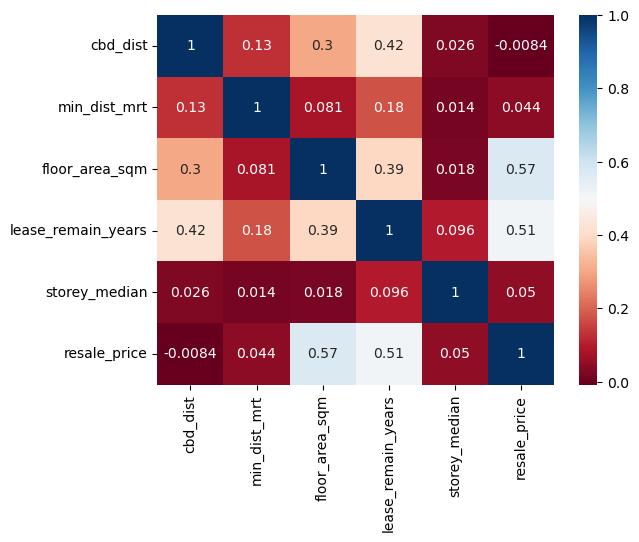

In [22]:
corrMatrix = scope_df.corr()
sns.heatmap(corrMatrix, 
        xticklabels=corrMatrix.columns,
        yticklabels=corrMatrix.columns,
        cmap='RdBu', # https://matplotlib.org/stable/tutorials/colors/colormaps.html
        annot=True)